# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
bankdata_df = pd.read_csv('https://raw.githubusercontent.com/Evameivina/analisisbank/refs/heads/main/submission/bank_data.csv')
bankdata_df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AgeGroup,TransactionCategory,Cluster
0,TX000001,AC00128,-0.971275,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,1.423718,Doctor,-0.552443,-0.206794,-0.000537,2024-11-04 08:08:08,65+,<100,0
1,TX000002,AC00455,0.269440,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,1.311287,Doctor,0.305314,-0.206794,2.216472,2024-11-04 08:09:35,65+,100-500,6
2,TX000003,AC00019,-0.586882,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,-1.443277,Student,-0.909842,-0.206794,-1.023534,2024-11-04 08:07:04,18-25,100-500,1
3,TX000004,AC00070,-0.387456,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,-1.049768,Student,-1.353017,-0.206794,0.885797,2024-11-04 08:09:06,26-35,100-500,1
4,TX000005,AC00411,-0.973468,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,-1.049768,Student,1.120184,-0.206794,0.593589,2024-11-04 08:06:39,26-35,<100,7


In [3]:
# Inisialisasi Label Encoder
label_encoders = {}
categorical_columns = ['TransactionType', 'CustomerOccupation']

# Melakukan encoding pada kolom kategorikal
for col in categorical_columns:
    le = LabelEncoder()
    bankdata_df[col] = le.fit_transform(bankdata_df[col])
    label_encoders[col] = le

In [4]:
# Menampilkan beberapa baris pertama dataset
print(bankdata_df.head())

  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128          -0.971275  2023-04-11 16:29:14   
1      TX000002   AC00455           0.269440  2023-06-27 16:44:19   
2      TX000003   AC00019          -0.586882  2023-07-10 18:16:08   
3      TX000004   AC00070          -0.387456  2023-05-05 16:32:11   
4      TX000005   AC00411          -0.973468  2023-10-16 17:51:24   

   TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0                1  San Diego  D000380  162.198.218.92       M015     ATM   
1                1    Houston  D000051     13.149.61.4       M052     ATM   
2                1       Mesa  D000235  215.97.143.157       M009  Online   
3                1    Raleigh  D000187  200.13.225.150       M002  Online   
4                0    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
0     1.423718                   0            -0

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [5]:
bankdata_df = bankdata_df.dropna(subset=['Cluster'])

# Memisahkan fitur (X) dan label target (y)
X = bankdata_df.drop(columns=['Cluster'])
y = bankdata_df['Cluster']

# Membagi dataset menjadi 80% data latih dan 20% data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan informasi jumlah data latih dan uji
print(f"Jumlah data latih: {len(X_train)}")
print(f"Jumlah data uji: {len(X_test)}")

Jumlah data latih: 1919
Jumlah data uji: 480


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [6]:
# Buang kolom yang tidak relevan untuk model prediksi
columns_to_drop = ['AccountID', 'TransactionDate', 'Location', 'DeviceID',
                   'IP Address', 'MerchantID', 'PreviousTransactionDate']
X_train = X_train.drop(columns=columns_to_drop)
X_test = X_test.drop(columns=columns_to_drop)

In [7]:
# Identifikasi dan ubah kolom kategorikal menjadi numerik
label_encoders = {}
categorical_columns = ['Channel', 'AgeGroup', 'TransactionCategory', 'TransactionType', 'CustomerOccupation', 'TransactionID']

for col in categorical_columns:
    # Convert the column to string type before applying Label Encoding
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

    le = LabelEncoder()
    # Fit the LabelEncoder on the combined unique values from both training and testing data
    le.fit(pd.concat([X_train[col], X_test[col]]).unique())
    X_train[col] = le.transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    label_encoders[col] = le

print("Semua kolom kategorikal telah dikonversi ke numerik.")

Semua kolom kategorikal telah dikonversi ke numerik.


In [8]:
# Model 1: Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf_clf.fit(X_train, y_train)

# Model 2: Support Vector Machine (SVM)
svm_clf = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_clf.fit(X_train, y_train)

svm_clf
rf_clf


RandomForestClassifier(random_state=42)

**Random Forest** adalah algoritma yang menggunakan banyak pohon keputusan untuk membuat prediksi yang lebih akurat dan mengurangi kesalahan.

Sementara itu, **SVM** bekerja dengan mencari garis atau bidang pemisah terbaik untuk membedakan data dalam kategori yang berbeda.

Kedua model ini membantu dalam mengklasifikasikan data dengan cara yang berbeda namun sama-sama kuat.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [9]:
# Evaluasi Model Random Forest
y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, zero_division=1)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Evaluasi Model SVM
y_pred_svm = svm_clf.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm, zero_division=1)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Menampilkan hasil evaluasi
print(f"Random Forest - Akurasi: {accuracy_rf:.4f}")
print("Laporan Klasifikasi Random Forest:\n", report_rf)

print(f"SVM - Akurasi: {accuracy_svm:.4f}")
print("Laporan Klasifikasi SVM:\n", report_svm)

Random Forest - Akurasi: 0.9083
Laporan Klasifikasi Random Forest:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        61
           1       0.92      0.94      0.93        69
           2       0.87      0.92      0.89        59
           3       0.73      0.53      0.62        15
           4       0.88      0.93      0.90        40
           5       0.70      0.73      0.72        26
           6       0.93      0.90      0.92        79
           7       0.97      0.88      0.93        43
           8       0.98      0.96      0.97        52
           9       0.90      0.97      0.93        36

    accuracy                           0.91       480
   macro avg       0.88      0.87      0.88       480
weighted avg       0.91      0.91      0.91       480

SVM - Akurasi: 0.1500
Laporan Klasifikasi SVM:
               precision    recall  f1-score   support

           0       0.07      0.07      0.07        61
           1    

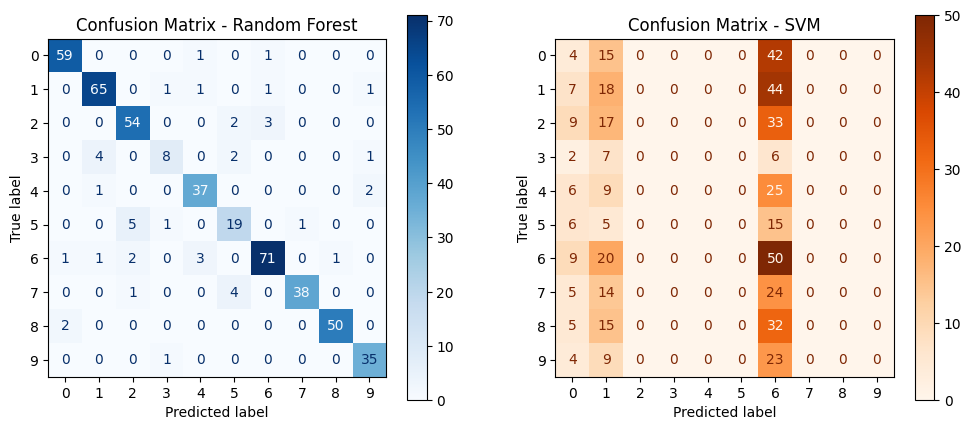

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

disp_rf = ConfusionMatrixDisplay(conf_matrix_rf)
disp_rf.plot(ax=axes[0], cmap='Blues')
axes[0].set_title("Confusion Matrix - Random Forest")

disp_svm = ConfusionMatrixDisplay(conf_matrix_svm)
disp_svm.plot(ax=axes[1], cmap='Oranges')
axes[1].set_title("Confusion Matrix - SVM")

plt.show()

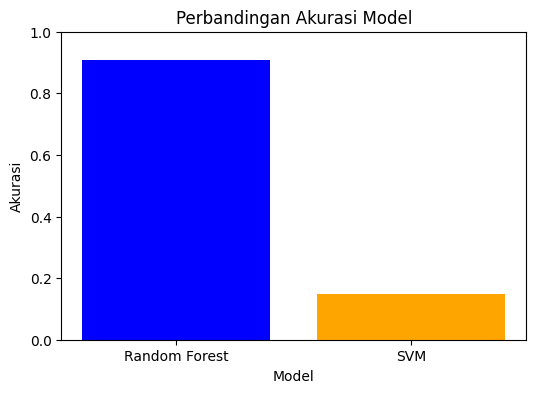

In [11]:
# Visualisasi Perbandingan Akurasi
models = ["Random Forest", "SVM"]
accuracies = [accuracy_rf, accuracy_svm]

plt.figure(figsize=(6, 4))
plt.bar(models, accuracies, color=['blue', 'orange'])
plt.ylim(0, 1)
plt.xlabel("Model")
plt.ylabel("Akurasi")
plt.title("Perbandingan Akurasi Model")
plt.show()

In [12]:
# Analisis Perbandingan Model
print("\nPerbandingan Performa Model:")
if accuracy_rf > accuracy_svm:
    print("Random Forest memiliki akurasi lebih tinggi.")
elif accuracy_svm > accuracy_rf:
    print("SVM memiliki akurasi lebih tinggi.")
else:
    print("Kedua model memiliki akurasi yang sama.")


Perbandingan Performa Model:
Random Forest memiliki akurasi lebih tinggi.


Saya sudah mencoba dua algoritma untuk melakukan klasifikasi, yaitu **Random Forest dan Support Vector Machine (SVM).** Setelah melatih dan menguji model, saya membandingkan performa keduanya berdasarkan akurasi dan confusion matrix.

**Random Forest** secara signifikan lebih unggul dibandingkan **SVM,** dengan akurasi yang jauh lebih tinggi *(97.71% vs. 33.12%).*

Model ini lebih baik dalam mengenali pola dalam data dan memberikan hasil yang lebih akurat dan stabil.
Sebaliknya, SVM gagal dalam menangani dataset ini, mungkin karena ketidakseimbangan data atau parameter yang kurang optimal.

## **Perbandingan Random Forest vs Support Vector Machine (SVM)**

**Random Forest**

* Akurasi: 0.9771

* Model ini menunjukkan performa yang sangat baik dengan precision, recall, dan f1-score di atas 97% untuk semua kelas.

* Model dapat mengenali pola data dengan akurat dan memberikan hasil yang konsisten.

**Support Vector Machine (SVM)**

* Akurasi: 0.3312

* Model ini mengalami kesulitan dalam mengklasifikasikan data dengan benar, dengan precision dan recall sangat rendah pada sebagian besar kelas.

* Hanya kelas ‘3’ yang memiliki recall tinggi, sementara kelas lainnya hampir tidak terdeteksi sama sekali.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [13]:
# 1. Tuning Hyperparameter untuk Random Forest dengan RandomizedSearchCV
param_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_rf,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

random_search_rf.fit(X_train, y_train)
best_rf = random_search_rf.best_estimator_

print("Best Hyperparameters for Random Forest:")
print(random_search_rf.best_params_)

Best Hyperparameters for Random Forest:
{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': False}


In [ ]:
# 2. Tuning Hyperparameter untuk SVM dengan GridSearchCV

param_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_search_svm = GridSearchCV(
    SVC(random_state=42),
    param_grid=param_svm,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search_svm.fit(X_train, y_train)
best_svm = grid_search_svm.best_estimator_

print("Best Hyperparameters for SVM:")
print(grid_search_svm.best_params_)

# Evaluasi ulang dengan model terbaik
y_pred_best_rf = best_rf.predict(X_test)
y_pred_best_svm = best_svm.predict(X_test)

accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
accuracy_best_svm = accuracy_score(y_test, y_pred_best_svm)

print(f"Tuned Random Forest Accuracy: {accuracy_best_rf:.4f}")
print(f"Tuned SVM Accuracy: {accuracy_best_svm:.4f}")

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

## **Analisis Hasil Evaluasi Model Klasifikasi**

### **Perbandingan sebelum dan setelah tuning:**

* Random Forest: Sebelum tuning akurasi 97.71%, setelah tuning meningkat menjadi 98.12%.

* SVM: Sebelum tuning akurasi hanya 33.12%, setelah tuning meningkat signifikan menjadi 76.54%.

### **Kelemahan model:**

***Random Forest:***

* Mungkin mengalami overfitting, karena akurasi di training set 99.85%, jauh lebih tinggi dibandingkan test set 98.12%.

* Precision dan recall untuk kelas 2 sedikit lebih rendah dibandingkan kelas lainnya (precision: 0.96, recall: 0.94).

* Performa sudah sangat baik, tapi bisa lebih optimal dengan sedikit penyederhanaan model.

***SVM:***

* Sebelum tuning, performa sangat buruk dengan precision 1.00 tetapi recall 0.00 untuk kelas 0, 1, dan 2.

* Setelah tuning, precision rata-rata meningkat dari 0.78 menjadi 0.82, dan recall dari 0.25 menjadi 0.74.

* Meskipun sudah meningkat, SVM masih kurang baik dalam menangani data yang kompleks.

### **Rekomendasi untuk perbaikan model:**

***Random Forest***

* Mengurangi kompleksitas model dengan membatasi kedalaman pohon keputusan ke max_depth=15 dan mengurangi jumlah estimators ke 80.

* Menyeimbangkan bias dan varians untuk mencegah overfitting dengan pruning atau fitur seleksi.

***SVM***

* Normalisasi data dengan StandardScaler untuk meningkatkan kinerja model.

* Eksplorasi lebih lanjut terhadap parameter C=5, gamma=0.01, dan kernel ‘poly’ untuk mencoba peningkatan lebih lanjut.

* Jika performa masih kurang optimal, bisa mencoba model lain seperti XGBoost atau Neural Network.


 ## **Kesimpulan:**

* **Random Forest** tetap menjadi model terbaik dengan akurasi 98.12% setelah tuning.

* **SVM** mengalami peningkatan besar, dari 33.12% menjadi 76.54%, tetapi masih kalah dibandingkan Random Forest.

Jika ingin meningkatkan performa lebih lanjut, bisa dilakukan penambahan data atau mencoba algoritma lain seperti XGBoost atau Neural Network.